In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load and preprocess data
df = pd.read_csv('./all_data.csv')  # Replace 'your_data.csv' with your dataset file path
data = df[['Loan Rate', 'Inflation', 'Buy Rate', 'Election', 'Close (Rs.)']]

# Normalize the data (scaling between 0 and 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Split data into features and target
X = []
y = []
sequence_length = 10  # Adjust this value as needed
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i+sequence_length, :-1])  # Features (all columns except the target)
    y.append(scaled_data[i+sequence_length, -1])  # Target (Close (Rs.))
X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))  # Output layer
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions)

# Reshape the predictions to match the original data shape
predictions = predictions.reshape(-1, 5)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions[:, -1])  # Use only the last column for evaluation
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Visualize the predictions
plt.figure(figsize=(12, 6))
plt.plot(predictions, label='Predicted Close (Rs.)', color='green')
plt.plot(y_test, label='Actual Close (Rs.)', color='blue')
plt.legend()
plt.show()

Epoch 1/50


2023-10-23 12:21:07.918799: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


391/391 [==============================] - 2s 4ms/step - loss: 0.0050
Epoch 2/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0049
Epoch 3/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0049
Epoch 4/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0049
Epoch 5/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0049
Epoch 6/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0049
Epoch 7/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0049
Epoch 8/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0049
Epoch 9/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0049
Epoch 10/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0049
Epoch 11/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0049
Epoch 12/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0049
Epoch 13/50
391/391 [===============

ValueError: non-broadcastable output operand with shape (3125,1) doesn't match the broadcast shape (3125,5)

Epoch 1/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0043
Epoch 2/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0041
Epoch 3/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0040
Epoch 4/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0040
Epoch 5/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0040
Epoch 6/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0040
Epoch 7/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0038
Epoch 8/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0038
Epoch 9/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0038
Epoch 10/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0036
Epoch 11/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0035
Epoch 12/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0032
Epoch 13/50
391/391 [====

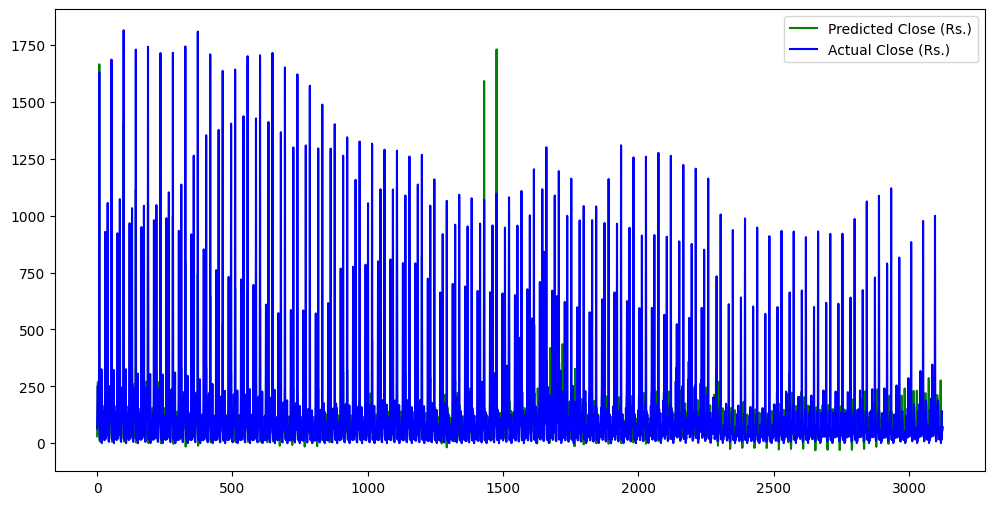

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load and preprocess data
df = pd.read_csv('./all_data.csv')  # Replace 'your_data.csv' with your dataset file path
data = df[['Close (Rs.)']].values

# Normalize the data (scaling between 0 and 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Define the sequence length (number of past time steps to consider)
sequence_length = 10  # Adjust this value as needed

# Create sequences of data for input and output
X = []
y = []

# Create sequences of data for input and output
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i+sequence_length])  # Use all available features
    y.append(scaled_data[i+sequence_length, 0])  # Target (Close (Rs.))

X, y = np.array(X), np.array(y)

# Reshape X to have the 3D shape (batch_size, time_steps, input_features)
X = X.reshape(X.shape[0], sequence_length, 1)  # Assuming you have a single

# Split the data into training and testing sets
split_ratio = 0.8  # Adjust the ratio as needed
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), predictions)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Visualize the predictions
plt.figure(figsize=(12, 6))
plt.plot(predictions, label='Predicted Close (Rs.)', color='green')
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Close (Rs.)', color='blue')
plt.legend()
plt.show()

In [4]:
df

,Label,Year,Month,Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.),Loan Rate,Inflation,Buy Rate,Election
0,ACL.N0000,1995,1,190.000000,1.5,750.0,145950.0,20.7,2.4,49.9600,0
1,ASIR.N0000,1995,1,33.911765,2.0,1074.0,39195.0,20.7,2.4,49.9600,0
2,BFL.N0000,1995,1,26.375000,14.0,5850.0,161200.0,20.7,2.4,49.9600,0
3,BOGA.N0000,1995,1,4.180556,8.0,8100.0,34362.5,20.7,2.4,49.9600,0
4,BRWN.N0000,1995,1,423.050000,2.0,400.0,180700.0,20.7,2.4,49.9600,0
...,...,...,...,...,...,...,...,...,...,...,...
15627,SHOT.N0000,2023,9,14.447368,45.0,74167.0,1045064.6,12.0,1.3,317.5436,0
15628,SPEN.N0000,2023,9,141.868421,24.0,9783.0,1400686.5,12.0,1.3,317.5436,0
15629,TILE.N0000,2023,9,47.631579,42.0,29117.0,1388307.2,12.0,1.3,317.5436,0
15630,TKYO.N0000,2023,9,56.300000,53.0,78086.0,4406369.4,12.0,1.3,317.5436,0


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

import pandas as pd
import os

# Initialize an empty list to store the dataframes
dataframes = []

# Specify the directory containing the CSV files
directory_path = "../DATASETS/CSE_DATA/SHARE_CHANGE/"

filenames = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the data
data = pd.DataFrame()

# Loop through the CSV files and read them into DataFrames
for file in filenames:
    df = pd.read_csv(file)
    # Extract the label from the file name and remove the ".csv" extension
    label = os.path.basename(file).replace(".csv", "")
    # Add the label as a new column
    df['Label'] = label
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Filter out data associated with the label 'SWAD.N0000'
combined_df = combined_df[combined_df['Label'] != 'SWAD.N0000']

# Convert 'Trade Date' from MM/DD/YY to DD/MM/YYYY format
combined_df['Trade Date'] = pd.to_datetime(combined_df['Trade Date'], format='%m/%d/%y').dt.strftime('%d/%m/%Y')

# Split 'Trade Date' into 'Day', 'Month', and 'Year' columns
combined_df[['Day', 'Month', 'Year']] = combined_df['Trade Date'].str.split('/', expand=True)


# Select the columns 'Label', 'Day', 'Month', 'Year', and 'Close (Rs.)'
selected_columns = ['Label', 'Day', 'Month', 'Year', 'Close (Rs.)']
result_df = combined_df[selected_columns]


# Group by 'Label', 'Year', and 'Month' and calculate the median
final_result = result_df.groupby(['Label', 'Year', 'Month'])['Close (Rs.)'].median().reset_index()


# Sort the DataFrame by 'Label' and the new date columns
final_result = final_result.sort_values(by=['Year', 'Month', 'Label'])

print(final_result)


# Specify the label you want to select
selected_label = 'BOGA.N0000'

# Use the loc method to select rows with the specified label
final_result = final_result.loc[final_result['Label'] == selected_label]
data = final_result[['Close (Rs.)']]
final_result

/var/folders/kp/bgyrqb3s3n19yxcx2cyqppwh0000gn/T/ipykernel_3057/2726107672.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(dataframes, ignore_index=True)


            Label  Year Month  Close (Rs.)
19629   JKH.N0000  1986    08         0.00
35686   SUN.N0000  1990    03        12.50
16090  GREG.N0000  1990    04         0.50
32359  SELI.N0000  1991    01       550.00
33994  SHAL.N0000  1991    02       575.00
...           ...   ...   ...          ...
40074  VPEL.N0000  2023    10         6.80
40078  WAPO.N0000  2023    10        31.50
40388  WATA.N0000  2023    10        74.20
40419  WIND.N0000  2023    10        18.55
40423  YORK.N0000  2023    10       165.00

[40424 rows x 4 columns]


,Label,Year,Month,Close (Rs.)
3778,BOGA.N0000,1992,05,11.875
3779,BOGA.N0000,1992,06,11.500
3780,BOGA.N0000,1992,07,10.500
3781,BOGA.N0000,1992,08,9.500
3782,BOGA.N0000,1992,09,10.000
...,...,...,...,...
4150,BOGA.N0000,2023,06,54.200
4151,BOGA.N0000,2023,07,57.600
4152,BOGA.N0000,2023,08,53.000
4153,BOGA.N0000,2023,09,52.100


Epoch 1/50
10/10 [==============================] - 1s 4ms/step - loss: 0.0406
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0248
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0174
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0149
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0118
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0079
Epoch 8/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0076
Epoch 9/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 10/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0075
Epoch 11/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0072
Epoch 12/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0067
Epoch 13/50
10/10 [==============================

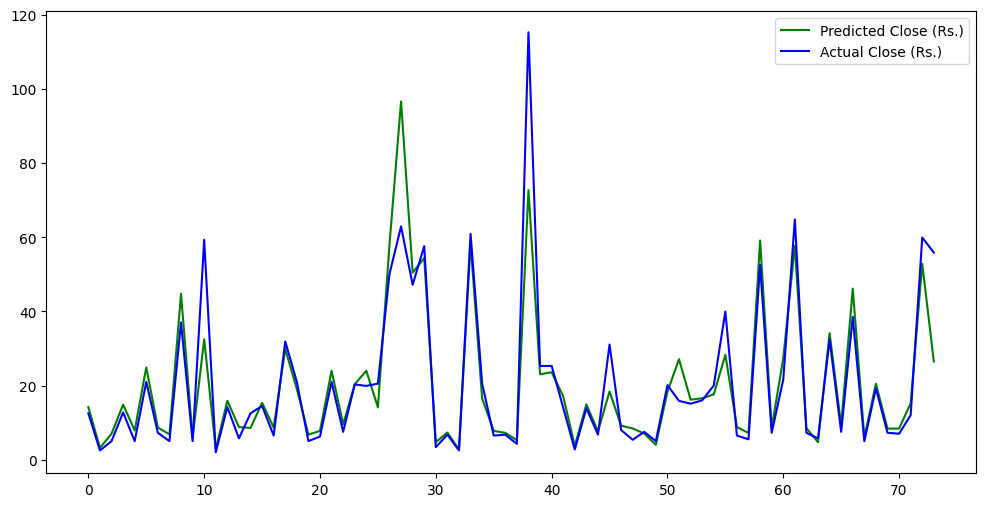

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Load and preprocess data
df = final_result # Replace 'your_data.csv' with your dataset file path
data = final_result[['Close (Rs.)']]

# Normalize the data (scaling between 0 and 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Define the sequence length (number of past time steps to consider)
sequence_length = 10  # Adjust this value as needed

# Create sequences of data for input and output
X = []
y = []

for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i + sequence_length])
    y.append(scaled_data[i + sequence_length])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))  # Output layer
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions to the original scale
predictions = scaler.inverse_transform(predictions)

# Evaluate the model
mse = mean_squared_error(scaler.inverse_transform(y_test), predictions)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Visualize the predictions
plt.figure(figsize=(12, 6))
plt.plot(predictions, label='Predicted Close (Rs.)', color='green')
plt.plot(scaler.inverse_transform(y_test), label='Actual Close (Rs.)', color='blue')
plt.legend()
plt.show()

Epoch 1/100
9/9 [==============================] - 1s 4ms/step - loss: 0.0385
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0187
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0117
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0084
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0067
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0054
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0052
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0051
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0048
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0046
Epoch 11/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0044
Epoch 12/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 13/100
9/9 [==============================] - 0s 4ms/st

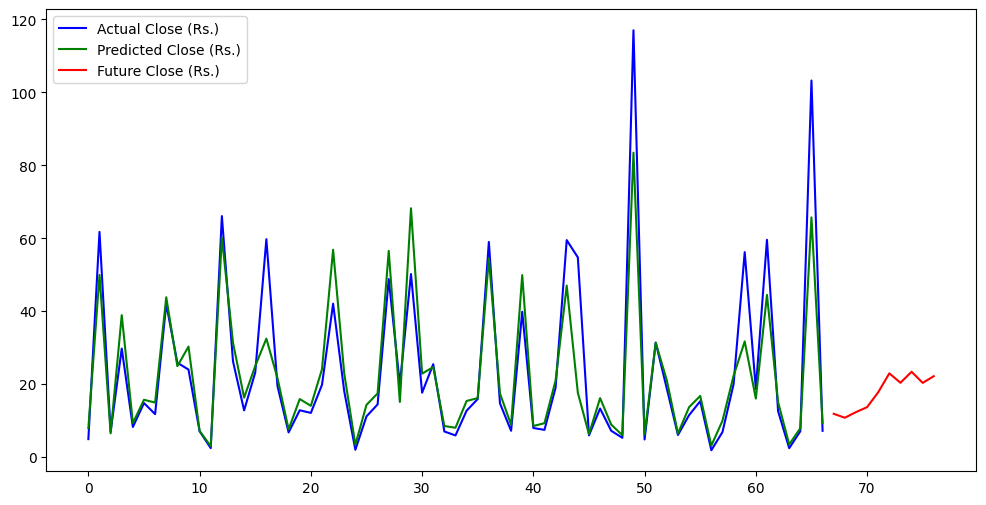

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Specify the label you want to select
selected_label = 'BOGA.N0000'

# Replace 'your_data.csv' with your dataset file path
final_result = pd.read_csv('./all_data.csv')
final_result = final_result.loc[final_result['Label'] == selected_label]
data = final_result[['Close (Rs.)']]  # Change this to the column you want to use for prediction

# Normalize the data (scaling between 0 and 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Define the sequence length (number of past time steps to consider)
sequence_length = 10  # Adjust this value as needed

# Create sequences of data for input and output
X = []
y = []

for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i + sequence_length, 0])
    y.append(scaled_data[i + sequence_length, 0])

X, y = np.array(X), np.array(y)

# Reshape X to match the model's input requirements
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions for the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Generate future predictions with added randomness for 10 data points
future_predictions = []
test_sequence = X_test[-1]

for _ in range(10):
    predicted_value = model.predict(np.array([test_sequence]))
    
    # Add randomness to the prediction
    randomness = np.random.normal(0, 0.03)  # You can adjust the standard deviation for more or less randomness
    predicted_value += randomness
    
    # Store the predicted value for future data points
    future_predictions.append(predicted_value[0, 0])

    # Update the test sequence with the new prediction for the next iteration
    test_sequence = np.roll(test_sequence, shift=-1)
    test_sequence[-1] = predicted_value[0, 0]

# Inverse transform the predictions
future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

# Reshape the test data for plotting
y_test_reshaped = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Create a timeline for the x-axis
timeline = np.arange(len(y_test_reshaped), len(y_test_reshaped) + len(future_predictions))

# Visualize the actual, predicted, and future 'Close (Rs.)' values
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_test_reshaped)), y_test_reshaped, label='Actual Close (Rs.)', color='blue')
plt.plot(np.arange(len(predictions)), predictions, label='Predicted Close (Rs.)', color='green')
plt.plot(timeline, future_predictions, label='Future Close (Rs.)', color='red')
plt.legend()
plt.show()